In [2]:
import numpy as np

import pandas as pd

import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import numpy as np

import pandas as pd
df = pd.read_csv("laptops.csv")

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [8]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2160   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA  ┃ NA %                  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ RAM          │   0 │                     0 │  15.41 │  9.868 │     4 │     8 │   16 │   16 │  128 │   ▇▁   │  │
│ │ Storage      │   0 │                     0 │  596.3 │  361.2 │     0 │   256 │  512 │ 1000 │ 4000 │   ▇▃   │  │
│ │ Screen       │   4 │   0.18518518518518517 │  15.17 │  1.203 │  10.1 │    14 │ 15.6 │ 15.6 │   18 │   ▃ ▇▁ │  │
│ │ Final Price  │   0 │                     0 │   1313 │  911.5 │ 201.1 │ 661.1 │ 1032 │ 1709 │ 7150 │  ▇▃▁   │  │
│ └──────────────┴─────┴───────────────────────┴────────┴────────┴───────┴───────┴──────┴──────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Laptop   │    0 │        0 │ Apple    │ Razer     │ ASUS     │ Vant      │     70.1 │       8.9 │    19231 │  │
│ │          │      │          │ MacBook  │ Blade 15  │ ROG      │ Moove3-14 │          │           │          │  │
│ │          │      │          │ Air      │ Advanced  │ Zephyrus │ Intel     │          │           │          │  │
│ │          │      │          │ i5/4GB/1 │ Model QHD │ M16      │ Core      │          │           │          │  │
│ │          │      │          │ 28GB/13. │ Intel     │ GU604VI- │ i5-1135G7 │          │           │          │  │
│ │          │      │          │ 3"       │ Core      │ 93D47PB1 │ /8GB/500G │          │           │          │  │
│ │          │      │          │          │ i7-11800H │  Intel   │ B SSD/14" │          │           │          │  │
│ │          │      │          │          │ /16       │ Core     │           │          │           │          │  │
│ │          │      │          │          │ GB/1TB    │ i9-13900 │           │          │           │          │  │
│ │          │      │          │          │ SSD/RTX   │ H/32GB/1 │           │          │           │          │  │
│ │          │      │          │          │ 3070/15.6 │ TB       │           │          │           │          │  │
│ │          │      │          │          │ " + Razer │ 

In [9]:
data = df.drop_duplicates()

In [10]:
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [11]:
data.drop(columns=["GPU"],inplace=True)

In [12]:
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


<Axes: >

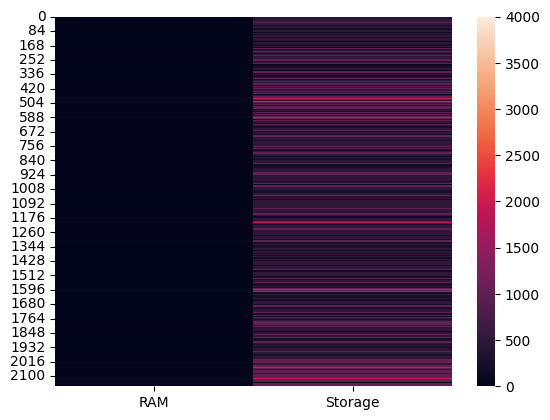

In [15]:
sns.heatmap(data.select_dtypes("int64","float64"))

In [16]:
Storage_type = data["Storage type"].value_counts()

<Axes: xlabel='Storage type'>

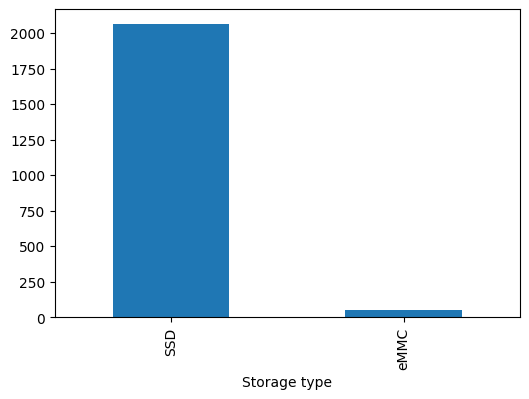

In [18]:
plt.figure(figsize=(6,4))

Storage_type.plot(kind="bar")

<Axes: xlabel='Status'>

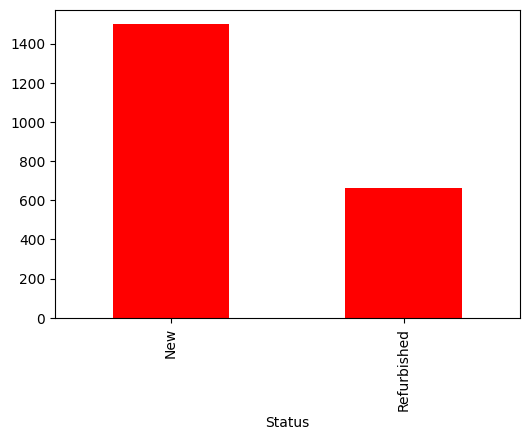

In [20]:
status = data["Status"].value_counts()

plt.figure(figsize=(6,4))

status.plot(kind="bar",color="red")

In [21]:
table = pd.crosstab(data["Status"],data["Storage type"],margins=True,normalize=True)

In [22]:
table

Storage type,SSD,eMMC,All
Status,,,
New,0.672805,0.023135,0.69594
Refurbished,0.300755,0.003305,0.30406
All,0.973560,0.026440,1.00000


In [23]:
table = pd.crosstab(data["Status"],data["Storage type"],values=df['RAM'], aggfunc='mean')

In [24]:
table

Storage type,SSD,eMMC
Status,,
New,15.09193,5.632653
Refurbished,17.44427,7.428571


In [25]:
proportion_table = round(table.div(table.sum(axis=1), axis=0)*100)

proportion_table

Storage type,SSD,eMMC
Status,,
New,73.0,27.0
Refurbished,70.0,30.0


<Axes: xlabel='Status'>

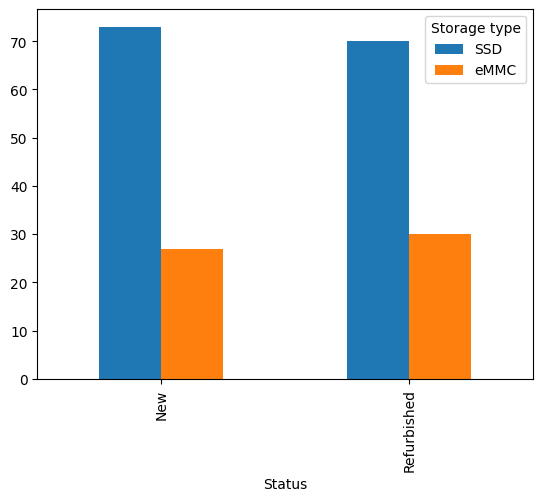

In [26]:
proportion_table.plot(kind="bar")

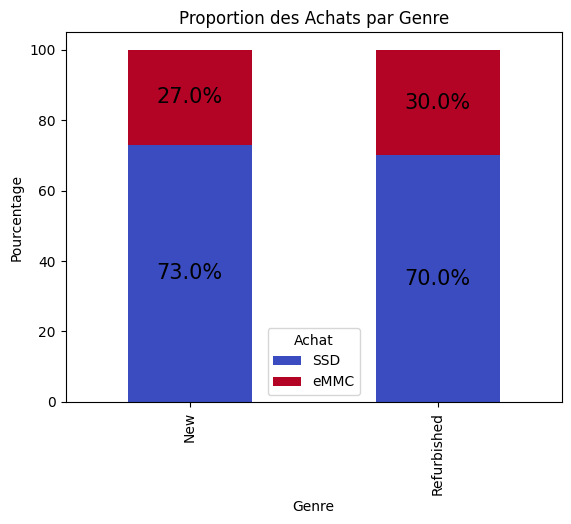

In [27]:
# Tracer le graphique
ax = proportion_table.plot(kind='bar', stacked=True, colormap='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f%%", label_type="center", color="black", fontsize=15)
# Ajouter un titre et labels
plt.title("Proportion des Achats par Genre")
plt.xlabel("Genre")
plt.ylabel("Pourcentage")
plt.legend(title="Achat")

# Afficher le graphique
plt.show()


In [28]:
cpu = data["CPU"].value_counts().head()

<Axes: xlabel='CPU'>

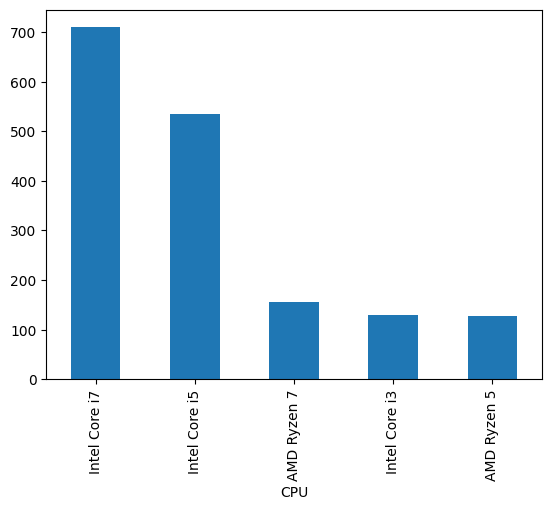

In [30]:
cpu.plot(kind="bar")

In [31]:
mean_price = data.groupby(by=["Brand"])["Final Price"].mean()

<Axes: xlabel='Brand'>

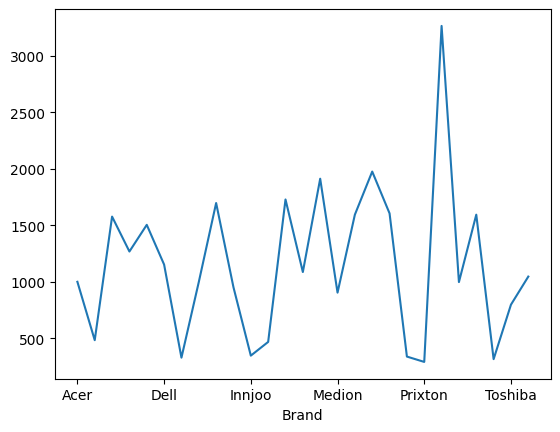

In [33]:
mean_price.plot()